In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

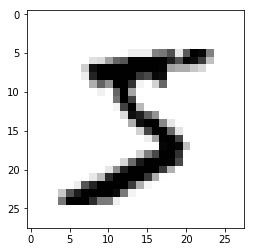

In [4]:
plt.imshow(x_train[0], cmap='gray_r')

In [5]:
from keras.utils.np_utils import to_categorical

In [6]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [7]:
y_cat_test[0].shape

(10,)

In [8]:
# Standardize the training and testing features
# Reshape to become normal images (4 dimensional tensor)

In [9]:
x_train = x_train / x_train.max()

In [10]:
x_test = x_test / x_test.max()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# 2d --> 1d
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1324 - acc: 0.9599
Epoch 2/2
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0466 - acc: 0.9852


In [19]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 9s 853us/step


[0.043236499525338874, 0.9866]

In [20]:
from sklearn.metrics import classification_report

In [21]:
predictions = model.predict_classes(x_test)

In [22]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      1.00      1135
          2       0.99      0.97      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.98      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.98      0.98      1028
          8       0.97      0.99      0.98       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [23]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)